In [15]:
import h5py
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/mnist_traindata.hdf5', 'r') as f:
    X_train = torch.tensor(f['xdata'][:], dtype=torch.float32)
    y_train = torch.tensor(f['ydata'][:], dtype=torch.float32)

In [4]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/mnist_testdata.hdf5', 'r') as f:
    X_test = torch.tensor(f['xdata'][:], dtype=torch.float32)
    y_test = torch.tensor(f['ydata'][:], dtype=torch.float32)

In [5]:
X_train.shape

torch.Size([60000, 784])

In [6]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [7]:
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = nn.Sequential(
    nn.Linear(784,10)
)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [10]:
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.01) #L2 regularization

In [11]:
epochs = 20
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for image,label in train_loader:
        image = image.to(device)
        label = label.to(device)
        #print(label.shape)
        image = image.view(-1, 28*28)
        optimizer.zero_grad()
        yhat = model(image)
        loss = loss_func(yhat,label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _,train_pred = torch.max(yhat.data,1)
        label = torch.argmax(label, dim=1)
        total_train += label.size(0)
        correct_train += (train_pred == label).sum().item()
    avg_train_loss=running_loss/len(train_loader)
    train_loss.append(avg_train_loss)
    accuracy1 = 100 * correct_train/total_train
    train_accuracy.append(accuracy1)

    model.eval()
    test_loss1 = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for image,label in test_loader:
            image = image.to(device)
            label = label.to(device)
            #print(label.shape)
            image = image.view(-1, 28*28)
            yhat = model(image)
            loss = loss_func(yhat,label)
            test_loss1 += loss.item()
            _,test_pred = torch.max(yhat.data,1)
            label = torch.argmax(label, dim=1)
            total_test += label.size(0)
            correct_test += (test_pred == label).sum().item()
    avg_test_loss=test_loss1/len(test_loader)
    test_loss.append(avg_test_loss)
    accuracy2 = 100 * correct_test/total_test
    test_accuracy.append(accuracy2)
    print(f'Epoch {epoch+1}/{epochs} => Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Train Accuracy: {accuracy1:.4f}, Test Accuracy: {accuracy2:.4f}')


Epoch 1/20 => Train Loss: 1.1711, Test Loss: 0.7363, Train Accuracy: 76.1283, Test Accuracy: 85.3000
Epoch 2/20 => Train Loss: 0.6624, Test Loss: 0.5740, Train Accuracy: 85.4400, Test Accuracy: 87.4800
Epoch 3/20 => Train Loss: 0.5618, Test Loss: 0.5118, Train Accuracy: 86.8067, Test Accuracy: 88.2800
Epoch 4/20 => Train Loss: 0.5154, Test Loss: 0.4779, Train Accuracy: 87.5950, Test Accuracy: 88.7900
Epoch 5/20 => Train Loss: 0.4884, Test Loss: 0.4571, Train Accuracy: 88.0567, Test Accuracy: 89.0500
Epoch 6/20 => Train Loss: 0.4704, Test Loss: 0.4425, Train Accuracy: 88.4383, Test Accuracy: 89.4600
Epoch 7/20 => Train Loss: 0.4578, Test Loss: 0.4323, Train Accuracy: 88.6500, Test Accuracy: 89.5800
Epoch 8/20 => Train Loss: 0.4485, Test Loss: 0.4246, Train Accuracy: 88.8950, Test Accuracy: 89.8400
Epoch 9/20 => Train Loss: 0.4413, Test Loss: 0.4188, Train Accuracy: 89.0717, Test Accuracy: 89.8200
Epoch 10/20 => Train Loss: 0.4357, Test Loss: 0.4140, Train Accuracy: 89.1917, Test Accurac

<function matplotlib.pyplot.show(close=None, block=None)>

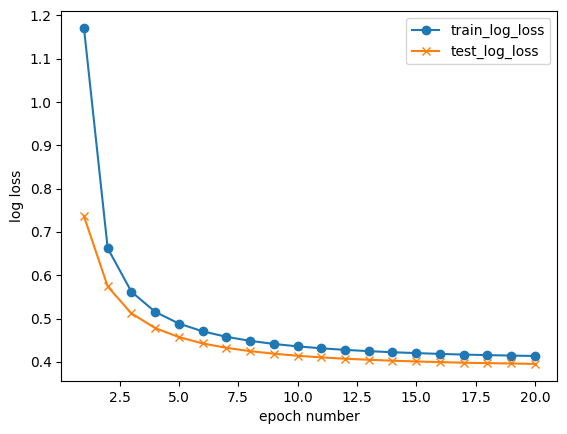

In [12]:
epoch = [i for i in range(1,21,1)]
plt.plot(epoch,train_loss ,marker='o', label='train_log_loss')
plt.plot(epoch,test_loss, marker='x', label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show

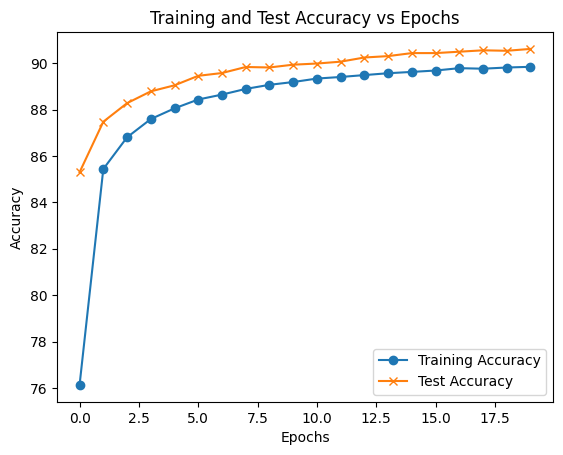

In [13]:
plt.plot(range(len(train_accuracy)), train_accuracy, marker='o', label='Training Accuracy')
plt.plot(range(len(test_accuracy)), test_accuracy, marker='x', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Epochs')
plt.legend()
plt.show()

In [16]:
cm = confusion_matrix(label,test_pred)

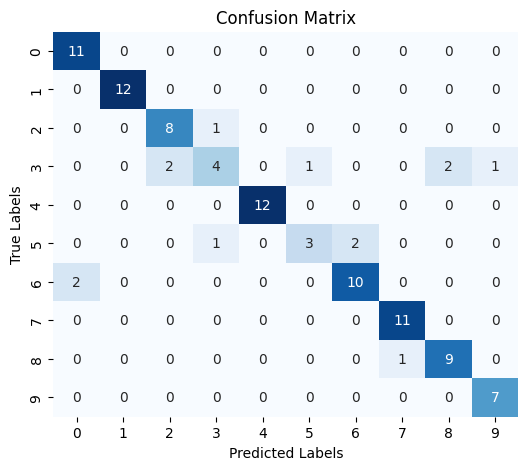

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()